Este colab fue desarrollado por Arnold Charry Armero.

# Productos Ordenados y Entregados Conjuntamente - Modelo EOQ

En muchas ocasiones las empresas no desean mantener un nivel alto de inventario almacenado. Por lo tanto, han decidido enfocarse en minimizar más bien el costo de ordenar, de manera que todos los productos que tienen se entreguen por el mismo proveedor o operador logístico (Chopra & Meindl, 2016). Este modelo es una extensión del Modelo EOQ que busca minimizar el número de veces que se tiene que entregar mercancía en el año a la empresa cliente.

**Supuestos:**

*   Existen varios productos en el sistema de inventarios
*   La demanda es uniforme y determinística
*   No se permiten faltantes
*   No hay un tiempo de entrega
*   Tasa de reabastecimiento infinita, es decir, toda la cantidad ordenada llega al mismo tiempo.

Matemáticamente, el modelo se expresa de la siguiente manera:

$$ TC(n) = \sum_{j = 1}^{k}\frac{D_{j}h_{j}}{2n} + Sn  $$

Sabiendo que,

$$ S = A + \sum_{j = 1}^{k}s_{j} $$

donde,

$ n = \mathrm{Número \:de \: ordenes \: en \: el \: año} $

$ k = \mathrm{Cantidad \: de \: productos} $

$ D_{j} = \mathrm{Tasa \:de \: demanda \: del \: producto \:} j $

$ A = \mathrm{Costo \:unitario \: de \: ordenar} $

$ s_{j} = \mathrm{Costo \:unitario \: de \: ordenar \:por \: producto\:}j $

$ S = \mathrm{Costo \:unitario \: de \: ordenar \: conjuntamente} $

$ h_{j} = \mathrm{Costo \:unitario \: de \: mantener \: en \: inventario \: del \: producto \:} j $

$ TC = \mathrm{Costo \: total \: promedio} $

Para saber la cantidad óptima de lote a ordenar, se debe derivar la función e igualar a 0. Matemáticamente se expresa esto de la siguiente manera,

$$ \frac{dTC(n)}{dn}= -\sum_{j = 1}^{k}\frac{D_{j}h_{j}}{2n^{2}}+S=0 $$

Despejando $n$,

$$ n^{*} = \sqrt{\frac{\sum_{j = 1}^{k}D_{j}h_{j}}{2S}} $$


Esta formula nos indica cada cuánto se debe ordenar con el fin de minimizar los costos de inventario. Ahora se continua con la implementación en código resolviendo el siguiente ejemplo.

Best Buy vende tres modelos de computadoras, Litepro, Medpro y Heavypro. Anualmente
las demandas para los tres productos son DL = 12.000 unidades para Litepro, DM = 1.200 unidades para Medpro,
y DH = 120 unidades para el Heavypro. Cada modelo le cuesta a Best Buy $\$500$.
Se incurre en un costo fijo de transporte de $\$4.000$ cada vez que se entrega un pedido. Para cada modelo pedido y
entregado en el mismo camión, se incurre en un costo fijo adicional de $\$1.000$ por modelo para recibir
y almacenamiento. Best Buy incurre en un costo de tenencia del 20 por ciento. Los tres gerentes de producto han decidido agregar
y pedir los tres modelos cada vez que realicen un pedido. Evaluar el tamaño de lote óptimo para
cada modelo.

In [1]:
#Se importan las librerias
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Se definen los parámetros.
c = [500, 500, 500]
D = [12000, 1200, 120]
A = 4000
s = [1000, 1000, 1000]
i = 0.2

In [3]:
#Se define la función
def TC(D, c, A, s, i, n):
  """
  Calcula el costo total promedio tomando en
  cuenta la cantidad n de ordenes

  Args:
    n: Número de ordenes.

  Returns:
    TC: Costo total promedio
  """
  P = 0
  s_total = 0
  for j in range(len(D)):
    P += (D[j] * i * c[j]) / (2 * n)
    s_total +=  s[j]
  S = s_total + A
  return P + S * n

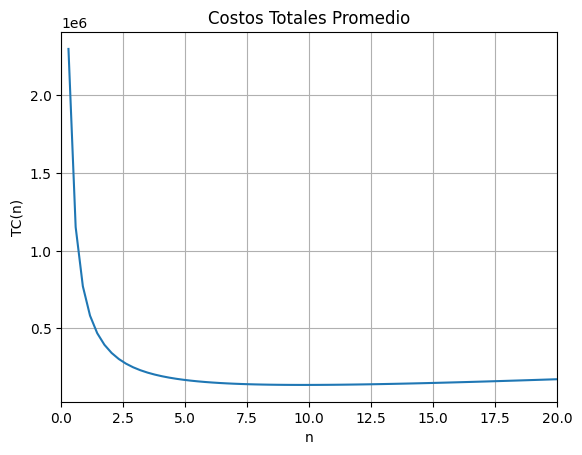

In [4]:
#Se grafica la función para entender mejor su comportamiento
x = np.linspace(0, 20, 70)
y = [TC(D, c, A, s, i, n) for n in x]
plt.grid()
plt.title("Costos Totales Promedio")
plt.xlim(0, 20)
plt.xlabel('n')
plt.ylabel('TC(n)')
plt.plot(x, y)

In [5]:
#Optimizando
n = [15]

def total_cost(n):
  cost = 0
  for j in range(0, len(n)):
    cost += TC(D, c, A, s, i, n)
  return cost

In [9]:
result = optimize.basinhopping(total_cost, n, minimizer_kwargs = {"method": "BFGS"}, niter = 100)
result

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 136557.6801208925
                          x: [ 9.754e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 1256
                       njev: 628
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 136557.6801208925
                                    x: [ 9.754e+00]
                                  nit: 7
                                  jac: [ 0.000e+00]
                             hess_inv: [[ 6.980e-04]]
                                 nfev: 18
                                 njev: 9

In [10]:
#Valor de n optimizado
optimized_n = result.x[0]
print("El número de ordenes debe de ser de {} ordenes".format(optimized_n))

El número de ordenes debe de ser de 9.75411994374665 ordenes


In [11]:
#Valor de TC optimizado - Costo Optimizado
optimized_TC = result.fun
print("El costo total minimizado es de ${}".format(optimized_TC))

El costo total minimizado es de $136557.6801208925


Del número de órdenes, se calcula.


$$ Q = \frac{D}{n} $$


Donde $Q$ es la cantidad de lote óptimo que minimiza los costos de inventario.

In [12]:
#Para cada producto

for j in range(len(D)):
  Q = D[j] / optimized_n
  print("Para el producto {} son {} unidades".format(j + 1, Q))

Para el producto 1 son 1230.2493786426298 unidades
Para el producto 2 son 123.024937864263 unidades
Para el producto 3 son 12.302493786426298 unidades


También existe la posibilidad de que se quieran juntar los productos selectivamente para minimizar los costos. De ser el caso, se debe realizar el siguiente procedimiento,

Considere los datos de Best Buy en el ejemplo 11-3. Los gerentes de producto han decidido realizar pedidos conjuntos, pero
ser selectivo sobre qué modelos incluyen en cada pedido. Evaluar la política de pedidos y
costos utilizando el procedimiento discutido anteriormente.

In [ ]:
#Paso 1 - Se halla la frecuencia de todos los productos.
def deliver_formula_n(c, D, A, s, i):
  return np.sqrt((i * c * D) / (2 * (A + s)))

products = []
for j in range(len(D)):
  product = deliver_formula_n(c[j], D[j], A, s[j], i)
  products.append(product)

n_bar = None
prod = 0
for j in range(len(D)):
  if n_bar is None or n_bar < products[j]:
    n_bar = products[j]
    prod = j

print("El producto con más entregas es el {} con {} entregas".format(prod + 1, n_bar))

El producto con más entregas es el 1 con 10.954451150103322 entregas


In [ ]:
#Paso 2 - Se calcula la cantidad de veces de los
#otros productos.
def other_products_formula_n(c, D, s, i):
  return np.sqrt((i * c * D) / (2 * s))

products = []
for j in range(len(D)):
  if j == prod:
    continue
  else:
    product = other_products_formula_n(c[j], D[j], s[j], i)
    products.append(product)
print(products)

[7.745966692414834, 2.449489742783178]


In [ ]:
#Paso 3 - Se recalcula el número de órdenes
import math as mt
m = []
for j in range(len(products)):
  Mn = mt.ceil(n_bar / products[j])
  m.append(Mn)
print("El nuevo número de órdenes es {}".format(m))
m.insert(0, mt.ceil(n_bar / n_bar))

El nuevo número de órdenes es [2, 5]


In [ ]:
#Paso 4 - Se vuelve a calcular el número
#de órdenes óptimas
def deliver_formula_n_m(c, D, A, s, i):
  Prods_num = 0
  Prods_den = 0
  for j in range(len(D)):
    Prods_num += i * c[j] * m[j] * D[j]
    Prods_den += s[j] / m[j]
  Prods_den = 2 * (Prods_den + A)
  return np.sqrt(Prods_num / Prods_den)

print("El número de órdenes totales es de {}.".format(deliver_formula_n_m(c, D, A, s, i)))

El número de órdenes totales es de 11.470786693528087.


In [ ]:
#Paso 5 - Se calcula el costo total con las órdenes
#por producto

n_total = []
n_optimal = deliver_formula_n_m(c, D, A, s, i)
for j in range(len(m)):
  nj = n_optimal / m[j]
  n_total.append(nj)

print(f"El número de órdenes por producto es {n_total}")

El número de órdenes por producto es [11.470786693528087, 5.735393346764043, 2.2941573387056176]


Quedando la función,

$$ TC(n) = An + \sum_{j = 1}^{l}n_{j}s_{j} + \sum_{j = 1}^{l}\frac{D_{j}h_{j}}{2n_{j}}   $$

donde,

$ n = \mathrm{Número \:de \: ordenes \: en \: el \: año} $

$ n_{j} = \mathrm{Número \:de \: ordenes \: por \: producto \:}j \mathrm{\: en \: el \: año}$

$ l = \mathrm{Cantidad \: de \: productos} $

$ D{j} = \mathrm{Tasa \:de \: demanda \: del \: producto \:} j $

$ A = \mathrm{Costo \:unitario \: de \: ordenar} $

$ s_{j} = \mathrm{Costo \:unitario \: de \: ordenar \:por \: producto\:}j $

$ h_{j} = \mathrm{Costo \:unitario \: de \: mantener \: en \: inventario \: del \: producto \:} j $

$ TC = \mathrm{Costo \: total \: promedio} $

In [ ]:
#Se calcula de nuevo el costo
def TC_heuristic(D, c, A, s, i, n, n_optimal):
  """
  Calcula el costo total promedio tomando en
  cuenta la cantidad n de ordenes

  Args:
    n: Número de ordenes.

  Returns:
    TC: Costo total promedio
  """
  P = 0
  s_total = 0
  for j in range(len(D)):
    P += (D[j] * i * c[j]) / (2 * n[j])
    s_total +=  s[j] * n[j]
  return P + s_total + A * n_optimal

print(f"El costo total es de ${TC_heuristic(D, c, A, s, i, n_total, n_optimal)}")

El costo total es de $130766.96830622021


De esta manera, queda por concluido el tema de la entrega de productos de manera conjunta.

#### Referencias


*   Chopra, S., & Meindl, P. (2016). Supply chain management: Strategy, planning, and operation, global edition (6th ed.). Pearson Education.
*   Sipper, D., & Bulfin, R. L. (1998). Planeación y control de la producción.
*   Zill, D. G. (2000). Cálculo de una variable: trascendentes tempranas (4a. ed.).

